## Using machine learning for algorithmic trading

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [9]:
# pip install yfinance

In [95]:
# Importing data
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [96]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.846382,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.426826,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.081497,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.257111,132079200


In [97]:
data.shape

(253, 6)

In [98]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [99]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [100]:
# Making a copy of the orignal dataframe
df = data

In [101]:
# Create the independent vaiables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [102]:
# Store the independent variable in a variable called x
X = df[['High-Low', 'Open-Close', 'Close']]
X.head()

,High-Low,Open-Close,Close
Date,,,
2020-01-02 00:00:00-05:00,1.352501,-1.027504,75.087502
2020-01-03 00:00:00-05:00,1.019997,-0.070000,74.357498
2020-01-06 00:00:00-05:00,1.802498,-1.502495,74.949997
2020-01-07 00:00:00-05:00,0.854996,0.362495,74.597504
2020-01-08 00:00:00-05:00,1.820000,-1.507500,75.797501


In [103]:
# Store the target vaiable into a vaiable called 'y', 
# If tomorrows close price is greater than todays close price then put 1 else 0
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)

# Show data
y

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [104]:
# Get the percentage to spilt the data (90% train data set, and 10% test data set)
percentage_split = 0.9
row = int(len(df) * percentage_split)

# Create the train data set
X_train = X[:row]
y_train = y[:row]

# Create the test data set
X_test = X[row:]
y_test = y[row:]

In [105]:
df.shape, df.shape[0], len(df)

((253, 8), 253, 253)

Importing the library for the machine learning model called Support Vector Classifier (SVC)



In [106]:
from sklearn.svm import SVC
# Create the model 
model = SVC()
# Train the model
model.fit(X_train[['Open-Close', 'High-Low']], y_train)


SVC()

In [107]:
# Check the score of the model on the train data set
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5947136563876652

In [108]:
# Check the score of the model on the test data set
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.4230769230769231

In [109]:
# Make and show predictions
df['Pridictions'] = model.predict(X[['Open-Close', 'High-Low']])
# Show predictions
df['Pridictions']

Date
2020-01-02 00:00:00-05:00    0
2020-01-03 00:00:00-05:00    1
2020-01-06 00:00:00-05:00    0
2020-01-07 00:00:00-05:00    1
2020-01-08 00:00:00-05:00    0
                            ..
2020-12-24 00:00:00-05:00    0
2020-12-28 00:00:00-05:00    0
2020-12-29 00:00:00-05:00    1
2020-12-30 00:00:00-05:00    1
2020-12-31 00:00:00-05:00    1
Name: Pridictions, Length: 253, dtype: int64

In [110]:
# Calculate the daily returns 
df['Return'] = df['Close'].pct_change(1)
# Show return
df['Return']

Date
2020-01-02 00:00:00-05:00         NaN
2020-01-03 00:00:00-05:00   -0.009722
2020-01-06 00:00:00-05:00    0.007968
2020-01-07 00:00:00-05:00   -0.004703
2020-01-08 00:00:00-05:00    0.016086
                               ...   
2020-12-24 00:00:00-05:00    0.007712
2020-12-28 00:00:00-05:00    0.035766
2020-12-29 00:00:00-05:00   -0.013315
2020-12-30 00:00:00-05:00   -0.008527
2020-12-31 00:00:00-05:00   -0.007703
Name: Return, Length: 253, dtype: float64

In [111]:
# Calculate the stratergy returns
df['Strat_return'] = df['Pridictions'].shift(1) * df['Return']

# Show the stratergy returns
df['Strat_return']

Date
2020-01-02 00:00:00-05:00         NaN
2020-01-03 00:00:00-05:00   -0.000000
2020-01-06 00:00:00-05:00    0.007968
2020-01-07 00:00:00-05:00   -0.000000
2020-01-08 00:00:00-05:00    0.016086
                               ...   
2020-12-24 00:00:00-05:00    0.007712
2020-12-28 00:00:00-05:00    0.000000
2020-12-29 00:00:00-05:00   -0.000000
2020-12-30 00:00:00-05:00   -0.008527
2020-12-31 00:00:00-05:00   -0.007703
Name: Strat_return, Length: 253, dtype: float64

In [112]:
# Calulate the cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()

# Calculation of the strategy cumulative returns
df['Cumul_Strategy'] =  df['Strat_return'].cumsum()

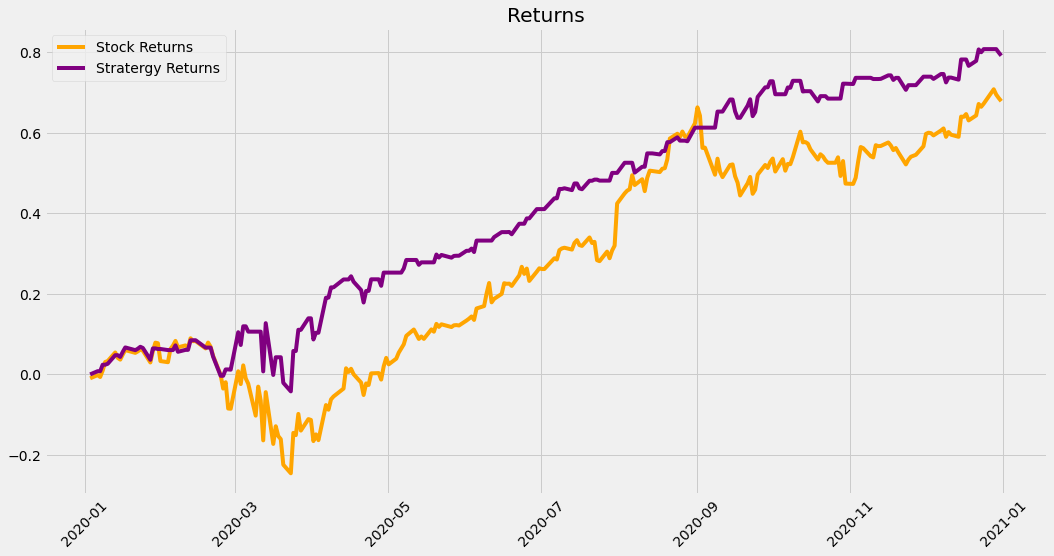

In [113]:
# viasualize and show the data
plt.figure(figsize=(16, 8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color='orange', label='Stock Returns')
plt.plot(df['Cumul_Strategy'], color='purple', label='Stratergy Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [114]:
print(f'The stock gives return of', df['Cumul_Ret'][-1]*100, '%')
print(f'The strategy gives return of', df['Cumul_Strategy'][-1]*100, '%')
# print(f'The strategy gives return of {df['Cumul_Strategy'][-1]*100}%')

The stock gives return of 67.87555035831274 %
The strategy gives return of 79.18534002931304 %
